# Tumor Segmentation Algorithms - *TumSeg*

*Author:* `Utku Türkbey`

*Date:* `09.09.2023`

*Copyright:* **All the content of this notebook is genuine work of the author unless otherwise specified with refences.**
<br>
<br>
**Welcome to *TumSeg* :)**

This colab notebook, so called *TumSeg Pipeline*, is designed to train a deep learning-based tumor segmentation algorithms to generate binary segmentation masks for tumors within 64x64x64 CT patches. Pipeline starts with train/test dataset preperation and continues with model training/inference, performance evaluation and finally ends with a demo inference to segment the tumors in your own CT patches.
<br>
<br>
**(Important!) How to navigate through notebook:**

First, you need to connect to a *Google Colab* runtime with a GPU (Any GPU is fine). Once you set the `PROJECT_DIRECTORY` variable in the `0) Configurations` block to your own {project_directory} and run this cell to configure your environment, you are ready to go through the notebook!

You may run cells of each block of the pipeline freely, as they are designed to be excecuted independently. However, some blocks are designed to be run once throughtout the project, such as dataset preperation or training, and it is not suggested to run them unless you really need to. There is no harm running them since they are designed to just overwirite the existing data but they may take very long time to finish and interrupting once started blocks might result in some data being neither overwritten nor untouched (i.e., simply lost).

On the other hand, there are blocks that are specifically designed for readers of this notebook to freely experiment with, such as data visualisation or demo inference. These blocks are marked with a `(RUN)` label as you are welcome to run them multiple times and furthermore, it is very motivated to experiment with these blocks so that you can further gain insights about the execution and results of the *TumSeg* algorithm.   <br>
<br>
**What is TumSeg:**

At the very essence, TumSeg is a group of 4 supervised deep learning-based binary semantic segmentation models trained and tested on a subset of *LIDC-IDRI Dataset of Lung Nodules on CT Scan* [1]. Determining model architectures, training models and running inferences on trained models are done with the utilization of *nnU-Net* [2] framework whic is a "self-configuring method for deep learning-based biomedical image segmentation" developed by *Division of Medical Image Computing (MIC), German Cancer Research Center (DKFZ)*. All the *TumSeg* models are based on the U-Net (PlainConvUNet [3] specifically) architecture proposed by *MIC-DKFZ*, yet different model dimensions (2D or 3D) and training approaches used (5-fold cross-validation or training on all data) produces 4 different models. For convenience, they are named as `2d`, `3d`, `2d-cv` and `3d-cv` throughout this notebook. Additionally, for benchmarking the performance of *TumSeg* models, a pre-trained network on the same dataset, Model Genesis [4] is also tested along with the *TumSeg* models. This pre-trained model is named as `genesis` in this notebook.

To dive deep into the details of algorithm development and performance evaluation proscesses, please go through the **notebook contents** and read the block descriptions :) Last block, `8) Discussion` provides the final comments on the pipeline that may helpfull.   <br>
<br>
**BONUS - Demo Inference:**

In the block `7) Demo Inference`, you may follow the guidelines and predict segmentation masks with any of the *TumSeg* models for your very own data freely.
<br>
<br>
**Notebook Contents:**
0. [Configurations (RUN)](#scrollTo=RVEsPsYH0-Eh)<br>
1. [Training Dataset Preparation](#scrollTo=19h8WxXNkDB-)<br>
2. [Test Dataset Preparation](#scrollTo=l-o6Qp__Luvb)<br>
3. [Dataset Visualisation (RUN)](#scrollTo=dXj8I4Yz5hd1)<br>
4. [Model Training](#scrollTo=7q4YmXOPJ891)<br>
    4.1. [Experiment Planning](#scrollTo=3ur8slMJBeTA)<br>
    4.2. [2D U-Net Models Training](#scrollTo=saajokpOLgpx)<br>
    4.3. [3D U-Net Models Training](#scrollTo=JWD76Mftqaaf)
5. [Inference](#scrollTo=zf8csFzqKG0K)<br>
    5.1. [2D U-Net Models Inference](#scrollTo=1H9XCzIbm4NM)<br>
    5.2. [3D U-Net Models Inference](#scrollTo=pMRSoodlmFnF)<br>
    5.3. [Pretrained Model Genesis Inference](#scrollTo=cOyEVxFcOBti)<br>
6. [Model Performance Evaluation](#scrollTo=wFpO2FMjYxOp)<br>
    6.1. [Prediction Visualisation (RUN)](#scrollTo=SGwvw0TMjDih)<br>
    6.2. [Evaluation Metrics](#scrollTo=XceNuvLSgqNZ)<br>
    6.3. [Evaluating Models](#scrollTo=JuHWaJpJgqcC)<br>
    6.4. [Evaluation Results Visualisation](#scrollTo=ZlAQbGt-gqhb)<br>
7. [Demo Inference (RUN)](#scrollTo=eY0yccOtiAc0)
8. [Discussion](#scrollTo=jriX4QHJYrfh)
<br>
<br>

**References:**

[1] [Data from The Lung Image Database Consortium (LIDC) and Image Database Resource Initiative (IDRI): A completed reference database of lung nodules on CT scans (LIDC-IDRI)](https://wiki.cancerimagingarchive.net/pages/viewpage.action?pageId=1966254)

[2] For further details on *nnU-NET Version 2* you may refer to:
1. *nnU-Net* paper: [Isensee, Fabian, et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nature methods 18.2 (2021): 203-211.](https://www.nature.com/articles/s41592-020-01008-z)
2. GitHub repo for [*nnUNet*](https://github.com/MIC-DKFZ/nnUNet/tree/master)

[3] [PlainConvUNet U-Net architecture](https://github.com/MIC-DKFZ/dynamic-network-architectures/blob/main/dynamic_network_architectures/architectures/unet.py) proposed by *MIC-DKFZ*

[4] For further details on *Models Genesis* you may refer to:
1. *Models Genesis* paper: [Zhou, Zongwei, et al. "Models genesis: Generic autodidactic models for 3d medical image analysis." Medical Image Computing and Computer Assisted Intervention–MICCAI 2019: 22nd International Conference, Shenzhen, China, October 13–17, 2019, Proceedings, Part IV 22. Springer International Publishing, 2019.](http://www.cs.toronto.edu/~liang/Publications/ModelsGenesis/MICCAI_2019_Full.pdf)
2. GitHub repo [*ModelsGenesis*](https://github.com/MrGiovanni/ModelsGenesis/tree/master/pytorch)
3. [Performance of *Models Genesis* on *LIDC-IDRI* dataset](https://paperswithcode.com/sota/lung-nodule-segmentation-on-lidc-idri)

# 0) Configurations (RUN)

This block is for configuring the project folder (and generate it from scratch if it does not already exist), environments for the *nnU-Net* and define some parameters such as noise stardard deviation to be used during the pipeline.

**! ! !** Please make sure to set `PROJECT_DIRECTORY` to your own project folder path and run the cell. If you do not receive any `!Generation errror` or `!New folder created` prompts, then probably no data is missing and you are good to go.

In [ ]:
!pip install torch --upgrade &> /dev/null
!pip install nnunetv2 &> /dev/null
!pip install --upgrade git+https://github.com/FabianIsensee/hiddenlayer.git &> /dev/null # (Optional) For visualizing U-Nets

import os
import nibabel as nib
import numpy as np
import json
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

from google.colab import drive
drive.mount('/content/drive')


def make_dir(path):
    if not os.path.isdir(path):
        try:
            os.mkdir(path)
            print("New folder created:", path)
            return path
        except:
            print("!Generation errror:", path)
            pass
    else:
        print("!Folder already exists:", path)
        return path


# ! Don't forget to set this absolute path to your own directory !
PROJECT_DIRECTORY = "ENTER_YOUR_OWN_PATH"

# Environment directories and variables for nnU-Net commands
NNUNET = make_dir(os.path.join(PROJECT_DIRECTORY, "nnUNet"))
NNUNET_RAW =  make_dir(os.path.join(NNUNET, "nnUNet_raw"))
NNUNET_PREPROCESSED =  make_dir(os.path.join(NNUNET, "nnUNet_preprocessed"))
NNUNET_RESULTS =  make_dir(os.path.join(NNUNET, "nnUNet_results"))
ENV_VARS = f"nnUNet_raw={NNUNET_RAW} nnUNet_preprocessed={NNUNET_PREPROCESSED} nnUNet_results={NNUNET_RESULTS} "


# Raw, Training and Test Dataset Directories
DATA_DIRECTORY = make_dir(os.path.join(PROJECT_DIRECTORY, "data"))

RAW_DATA_DIRECTORY = make_dir(os.path.join(DATA_DIRECTORY, "raw"))
RAW_IMG_DIRECTORY = make_dir(os.path.join(RAW_DATA_DIRECTORY, "img"))
RAW_MASK_DIRECTORY = make_dir(os.path.join(RAW_DATA_DIRECTORY, "mask"))

NNUNET_DATASET_DIRECTORY = make_dir(os.path.join(NNUNET_RAW, "Dataset011_CaseStudy"))
TRAINING_IMAGE_DIRECTORY = make_dir(os.path.join(NNUNET_DATASET_DIRECTORY, "imagesTr"))
TRAINING_MASK_DIRECTORY = make_dir(os.path.join(NNUNET_DATASET_DIRECTORY, "labelsTr"))

TESTSET_DIRECTORY = make_dir(os.path.join(DATA_DIRECTORY, "test"))
CLEAN_IMG_DIRECTORY = make_dir(os.path.join(TESTSET_DIRECTORY, "img_clean"))
NOISY_IMG_DIRECTORY = make_dir(os.path.join(TESTSET_DIRECTORY, "img_noisy"))
MASK_DIRECTORY = make_dir(os.path.join(TESTSET_DIRECTORY, "mask"))

# Directories to save results
RESULTS_DIRECTORY = make_dir(os.path.join(PROJECT_DIRECTORY, "results"))
MODELS_DIRECTORY =  make_dir(os.path.join(RESULTS_DIRECTORY, "models"))
PREDICTIONS_DIRECTORY =  make_dir(os.path.join(RESULTS_DIRECTORY, "predictions"))

# Directories to save predicted segmentation masks
CLEAN_2D = make_dir(os.path.join(PREDICTIONS_DIRECTORY, "2d_clean" ))
NOISY_2D = make_dir(os.path.join(PREDICTIONS_DIRECTORY, "2d_noisy" ))
CV_CLEAN_2D = make_dir(os.path.join(PREDICTIONS_DIRECTORY, "2d-cv_clean" ))
CV_NOISY_2D = make_dir(os.path.join(PREDICTIONS_DIRECTORY, "2d-cv_noisy" ))
CLEAN_3D = make_dir(os.path.join(PREDICTIONS_DIRECTORY, "3d_clean" ))
NOISY_3D = make_dir(os.path.join(PREDICTIONS_DIRECTORY, "3d_noisy" ))
CV_CLEAN_3D = make_dir(os.path.join(PREDICTIONS_DIRECTORY, "3d-cv_clean" ))
CV_NOISY_3D = make_dir(os.path.join(PREDICTIONS_DIRECTORY, "3d-cv_noisy" ))
CLEAN_GENESIS = make_dir(os.path.join(PREDICTIONS_DIRECTORY, "genesis_clean" ))
NOSIY_GENESIS = make_dir(os.path.join(PREDICTIONS_DIRECTORY, "genesis_noisy" ))

# Directories for demo inference
DEMO_INFERENCE_DIRECTORY = make_dir(os.path.join(PROJECT_DIRECTORY, "demo_inference"))
DEMO_INPUT = make_dir(os.path.join(DEMO_INFERENCE_DIRECTORY, "demo_input"))
DEMO_OUTPUT = make_dir(os.path.join(DEMO_INFERENCE_DIRECTORY, "demo_output"))

# Parameters
NOISE_STD = 0.1 # Standard deviation for the Gaussian noise
THRESHOLD = 0.5 # For postprocessing predicted masks
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# 1) Training Dataset Preparation (for *nnU-Net*)

This block builds a training dataset compatible with *nnU-Net Version 2* using the data located at `data/raw/`. Generated dataset is stored at `nnUNet/nnUNet_raw/Dataset011_CaseStudy/`.
<br>
<br>
Of the `2240` raw image and mask pairs, `7/8 (1960)` is used for training the U-Nets and `1/8 (280)` is saved for inference. `Gaussion noise` with `mean=0` and `std=0.1` added to the training images.
<br>
<br>
For the details of nnU-Net Version 2 dataset format, you may check the [nnU-Net dataset format](https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/dataset_format.md)

In [ ]:
all_filenames = [f for f in sorted(os.listdir(RAW_IMG_DIRECTORY)) if f.endswith('.nii.gz')]

for index, filename in enumerate(all_filenames, start=1):

    img = nib.load(os.path.join(RAW_IMG_DIRECTORY, filename))
    mask = nib.load(os.path.join(RAW_MASK_DIRECTORY, filename))

    data = img.get_fdata() # Get the image data as a numpy array
    noisy_data = data + np.random.normal(0, NOISE_STD, data.shape) # Add random Gaussian noise
    noisy_data = np.clip(noisy_data, 0, 255) # Clip noisy data to the [0, 255] range
    noisy_img = nib.Nifti1Image(noisy_data.astype(np.uint8), img.affine) # Create a new NIfTI image with the noisy data

    # Filename for the noisy image and mask
    img_output_filename = os.path.join(TRAINING_IMAGE_DIRECTORY, f'TRAIN_{index:04d}_0000.nii.gz') # _0000 is to label CT modality and is required for training nnU-Net
    mask_output_filename = os.path.join(TRAINING_MASK_DIRECTORY, f'TRAIN_{index:04d}.nii.gz')

    if index <= int(len(all_filenames) * (7/8)):
        # Save the training images(noisy) and masks
        nib.save(noisy_img, img_output_filename)
        nib.save(mask, mask_output_filename)

dataset_json = {
    "channel_names": {
        "0": "CT"
    },
    "labels": {
        "background": 0,
        "tumor": 1
    },
    "numTraining": int(len(all_filenames) * (7/8)),
    "file_ending": ".nii.gz"
}

with open(NNUNET_DATASET_DIRECTORY + "/dataset.json", 'w') as json_file:
    json.dump(dataset_json, json_file, indent=4)

# 2) Test Dataset Preperation

This block builds a test dataset using `1/8 (280)` of the data located at `data/raw/`. Generated dataset is stored at `data/test/`.

`test/img_noisy/` includes noised CT scans and `test/img_clean/` includes the clean CT scans which are identical to raw images. Finally, `test/mask/` contains the ground truth segmentation masks and are saved with the same name as images except that they do not end with `_0000`, which is a tag that implies CT modality and is required for inferencing with *nnU-Net*.

In [ ]:
all_filenames = [f for f in sorted(os.listdir(RAW_IMG_DIRECTORY)) if f.endswith('.nii.gz')]

num_of_train_images = int(len(all_filenames) * (7/8))

for index, filename in enumerate(all_filenames, start=1):
    if index > num_of_train_images:
        img = nib.load(os.path.join(RAW_IMG_DIRECTORY, filename))
        mask = nib.load(os.path.join(RAW_MASK_DIRECTORY, filename))

        data = img.get_fdata() # Get the image data as a numpy array
        noisy_data = data + np.random.normal(0, NOISE_STD, data.shape) # Add random Gaussian noise
        noisy_data = np.clip(noisy_data, 0, 255) # Clip noisy data to the [0, 255] range
        noisy_img = nib.Nifti1Image(noisy_data.astype(np.uint8), img.affine) # Create a new NIfTI image with the noisy data

        # Filename for the noisy image and mask
        clean_img_output_filename = os.path.join(CLEAN_IMG_DIRECTORY, f'TEST_{index - num_of_train_images:04d}_0000.nii.gz')
        noisy_img_output_filename = os.path.join(NOISY_IMG_DIRECTORY, f'TEST_{index - num_of_train_images:04d}_0000.nii.gz')
        mask_output_filename = os.path.join(MASK_DIRECTORY, f'TEST_{index - num_of_train_images:04d}.nii.gz')

        # Save the training images (original + noisy) and masks
        nib.save(img, clean_img_output_filename)
        nib.save(noisy_img, noisy_img_output_filename)
        nib.save(mask, mask_output_filename)

# 3) Data Visualisation (RUN)

You may use the `vis_data(...)`to test if the previous dataset generation blocks for successfully generated the training dataset for nnU-Net and test dataset for inference. Furthermore, visualize either the train or test images with accompanying segmentation masks and added noise for the desired index.

Be careful with the index value, as the test dataset contains 280(0 to 279) images and train dataset contains 1960(0 to 1959) images.

**Note:** First func call takes a little while due to loading all file names in dataset but next calls are quiet fast thanks to caching.  

In [2]:
def vis_data(index = 10, train=True, slice = 32):
    """
    vis_data Visualizes a representative slice for the desired CT scan
    from either training or test dataset. Added noise and segmentation masks
    are also provided.
    param index:  Index of the visualized CT scan within the desired dataset.
    param train:  True if training dataset is used. False if test dataset is used.
    param slice:  Slice index of the CT scan to be visualized.
    return:       None, visualizes the data and prompts the according filenames.
    """

    if train:
        raw_img_path = RAW_IMG_DIRECTORY
        noisy_img_path = TRAINING_IMAGE_DIRECTORY
        mask_path = TRAINING_MASK_DIRECTORY
    else: #test
        raw_img_path = CLEAN_IMG_DIRECTORY
        noisy_img_path = NOISY_IMG_DIRECTORY
        mask_path = MASK_DIRECTORY

    all_raw_img_names = [f for f in sorted(os.listdir(raw_img_path)) if f.endswith('.nii.gz')]
    all_noisy_img_names = [f for f in sorted(os.listdir(noisy_img_path)) if f.endswith('.nii.gz')]
    all_mask_names = [f for f in sorted(os.listdir(mask_path)) if f.endswith('.nii.gz')]

    raw_img = nib.load(os.path.join(raw_img_path, all_raw_img_names[index])).get_fdata()
    noisy_img = nib.load(os.path.join(noisy_img_path, all_noisy_img_names[index])).get_fdata()
    mask = nib.load(os.path.join(mask_path, all_mask_names[index])).get_fdata()

    fig, axes = plt.subplots(2,2)
    axes[0,0].imshow(raw_img[slice], cmap='gray')
    axes[0,0].axis('off')
    axes[0,0].set_title(f'{"Raw" if train else "Clean"} CT {index}(S:{slice})')
    axes[0,1].imshow(noisy_img[slice], cmap='gray')
    axes[0,1].axis('off')
    axes[0,1].set_title(f'Noisy CT {index}(S:{slice})')
    axes[1,0].imshow(mask[slice], cmap='gray')
    axes[1,0].axis('off')
    axes[1,0].set_title(f'Mask {index} (GT)')
    axes[1,1].imshow(np.abs(raw_img[slice]- noisy_img[slice]), cmap='gray')
    axes[1,1].axis('off')
    axes[1,1].set_title(f'Noise {index}(S:{slice})')

    print(("Train" if train else "Test"), "Dataset => CT:", index, "Slice:", slice)
    #print("Raw Image filename:", os.path.join(raw_img_path, all_raw_img_names[index]))
    #print("Noisy Image filename:", os.path.join(noisy_img_path, all_noisy_img_names[index]))
    #print("Mask filename:", os.path.join(mask_path, all_mask_names[index]))
    print()
    return

Test Dataset => CT: 0 Slice: 32

Train Dataset => CT: 0 Slice: 32



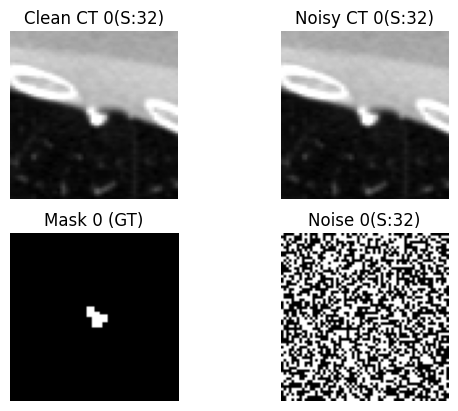

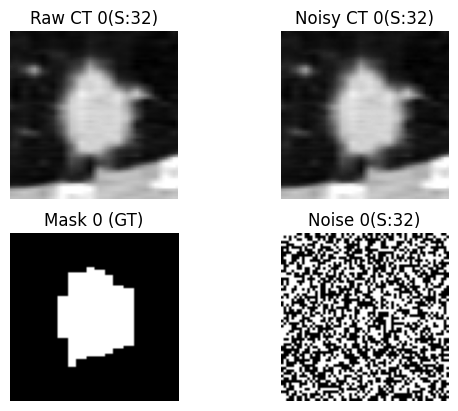

In [3]:
# Example data visualization
vis_data(0, False) # Image 3 from test dataset
vis_data(0) # Image 3 from training dataset

# 4) Model Training

Given a new dataset, *nnU-Net* extracts a dataset fingerprint (a set of dataset-specific properties such as image sizes, voxel spacings, intensity information etc). This information is stored at `nnUNet/nnUNet_preprocessed/` and is used to train U-Net configurations.<br>
<br>
For the given dataset, *nnU-Net* proposed two *PlainConvUNet*  architectures: a `2D U-Net` and a `3D U-Net`. Each of these architectures are trained on noisy images seperately with `full` data and `5-fold cross validation`. prroducing 4 models (12 if you count 5 cross-validation models seperately) in total named as `2d-cv`, `3d-cv`, `2d` and `3d`. All model weights and further training details are stored at `nnUNet/nnUNet_results/Dataset011_CaseStudy/nnUNetTrainer__nnUNetPlans__2d/fold_X/` and `nnUNet/nnUNet_results/Dataset011_CaseStudy/nnUNetTrainer__nnUNetPlans__3d_fullres/fold_X/` where `X` is the fold number.  <br>
<br>Due to long training times, `number of epochs` each model is trained for are decided based on the provided `training progress graphs` after each epoch. Overfitting behavior is selected as the primary concern. You may find these `training progress graphs` (which are also located at `fold_X` folders) at the end of each training cell as images.<br>
<br>
As the model training times range from `2` (for 3D) to `11` (for 2D) hours, 3 Colab Notebooks connected to 3 seperate GPUs are utilized and training commands are executed in parallel. This seperate/parallel scheeme is preferred as Colab offers a single GPU for a notebook. Finally, the executed command blocks gathered in this single notebook for convenience of readers but some block outputs might be lost during the transfer between notebooks. Full execution logs for model trainings can also be found in `fold_X` folders.
<br>
<br>
For further details on model training with nnU-Net see [How to use nnU-Net](https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/how_to_use_nnunet.md)

## 4.1) Experiment Planning



In [ ]:
!{ENV_VARS + "nnUNetv2_plan_and_preprocess -d 11 --verify_dataset_integrity"}

## 4.2) 2D U-Net Models Training

### `2d-cv`

2d / **5-fold Cross-Validation**

Train 5 models with 2D U-Net architecture for each fold of 5-fold cross-validation.

In [ ]:
# Fold 1/5
!{ENV_VARS + "nnUNetv2_train 11 2d 0 --c --npz"}

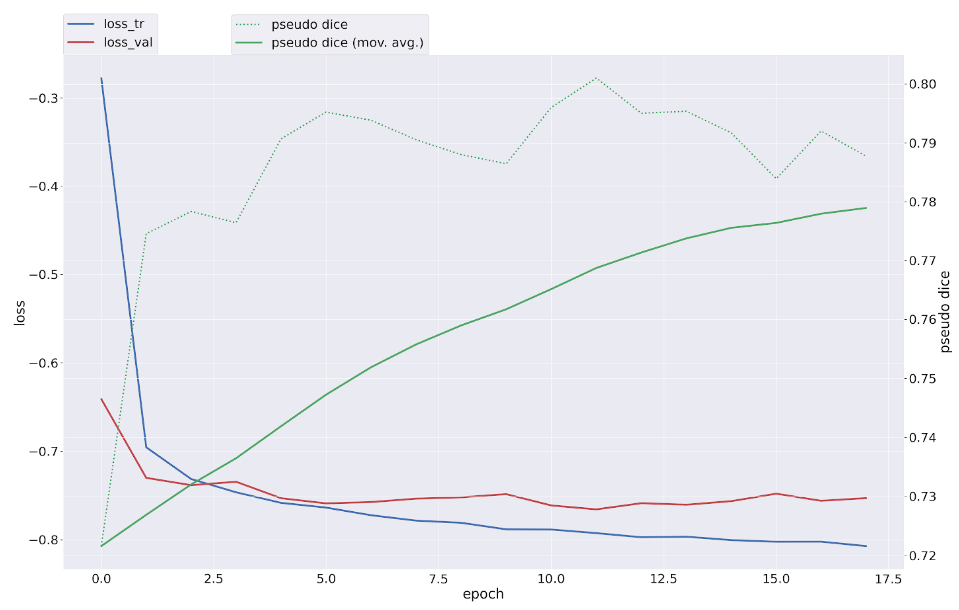

In [ ]:
# Fold 2/5
!{ENV_VARS + "nnUNetv2_train 11 2d 1 --c --npz"}

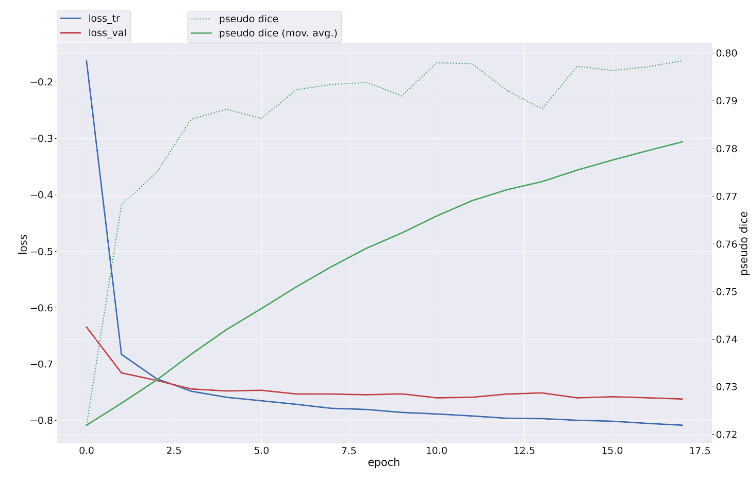

In [ ]:
# Fold 3/5
!{ENV_VARS + "nnUNetv2_train 11 2d 2 --c --npz"}

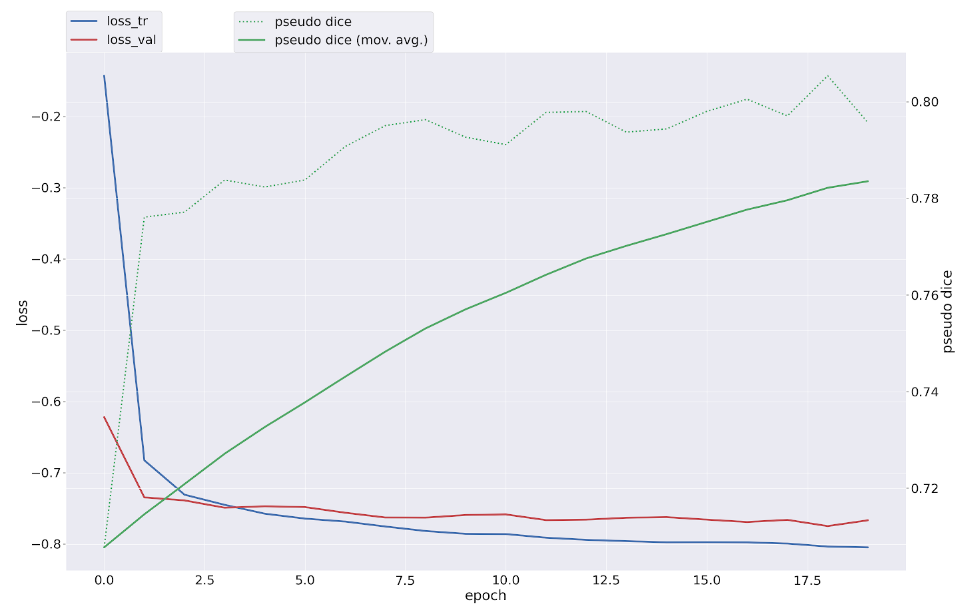

In [ ]:
# Fold 4/5
!{ENV_VARS + "nnUNetv2_train 11 2d 3 --c --npz"}

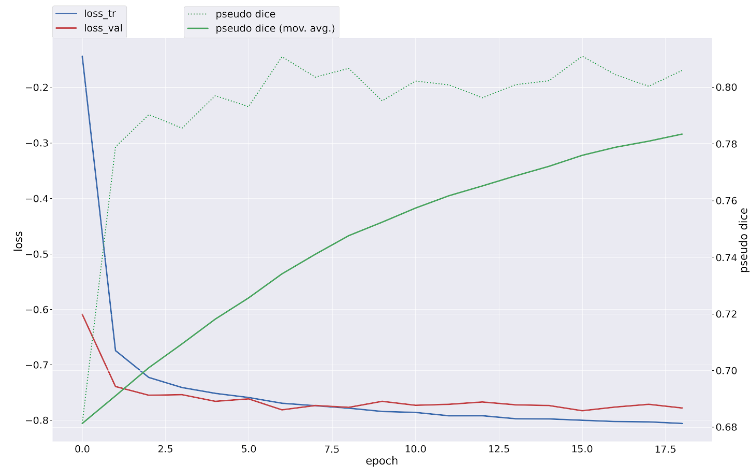

In [ ]:
# Fold 5/5
!{ENV_VARS + "nnUNetv2_train 11 2d 4 --c --npz"}

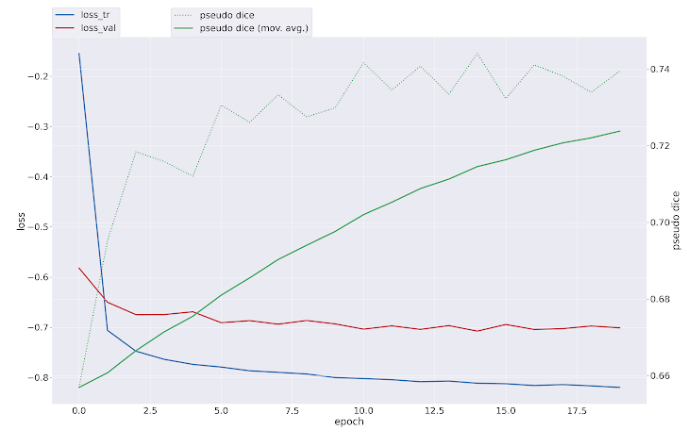

### `2d`

2d / **ALL**

Train a single model with 2D U-Net architecture on **all** training cases.

In [ ]:
!{ENV_VARS + "nnUNetv2_train 11 2d all --c --npz"}

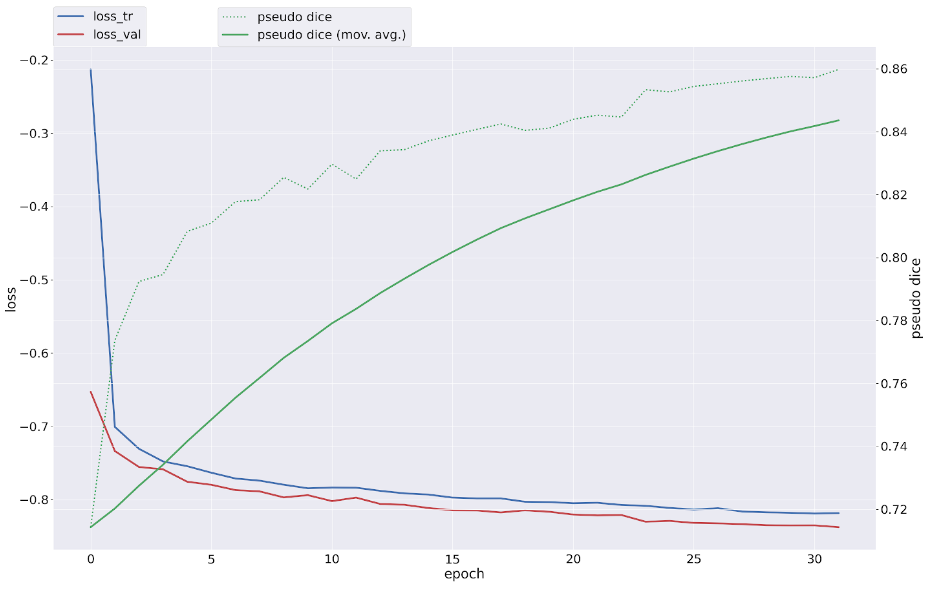

## 4.3) 3D U-Net Models Training

### `3d-cv`
3d_fullres / **5-fold Cross-Validation**

Train 5 models with 3D U-Net architecture for each fold of 5-fold cross-validation.

In [ ]:
# Fold 1/5
!{ENV_VARS + "nnUNetv2_train 11 3d_fullres 0 --c --npz"}

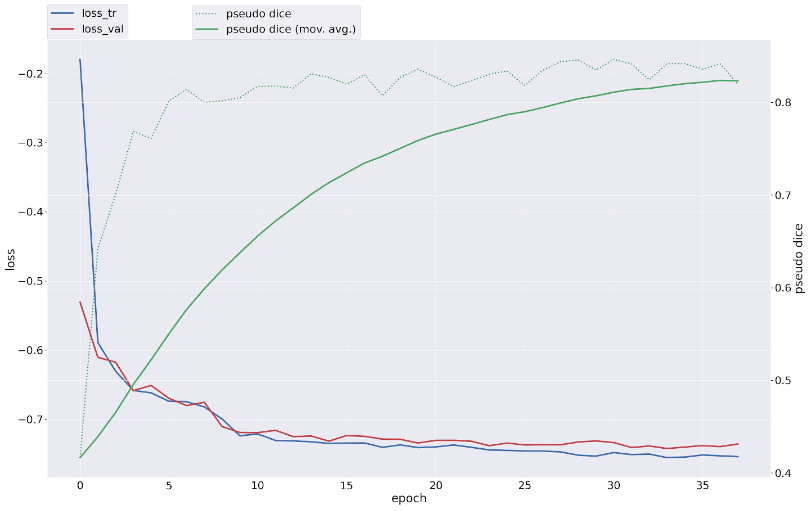

In [ ]:
# Fold 2/5
!{ENV_VARS + "nnUNetv2_train 11 3d_fullres 1 --c --npz"}

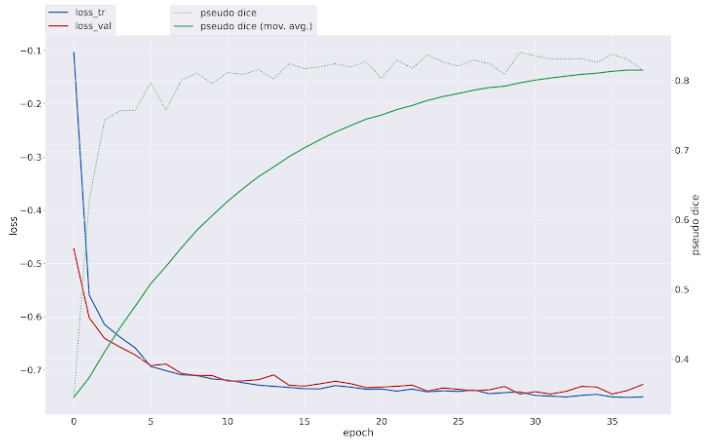

In [ ]:
# Fold 3/5
!{ENV_VARS + "nnUNetv2_train 11 3d_fullres 2 --c --npz"}

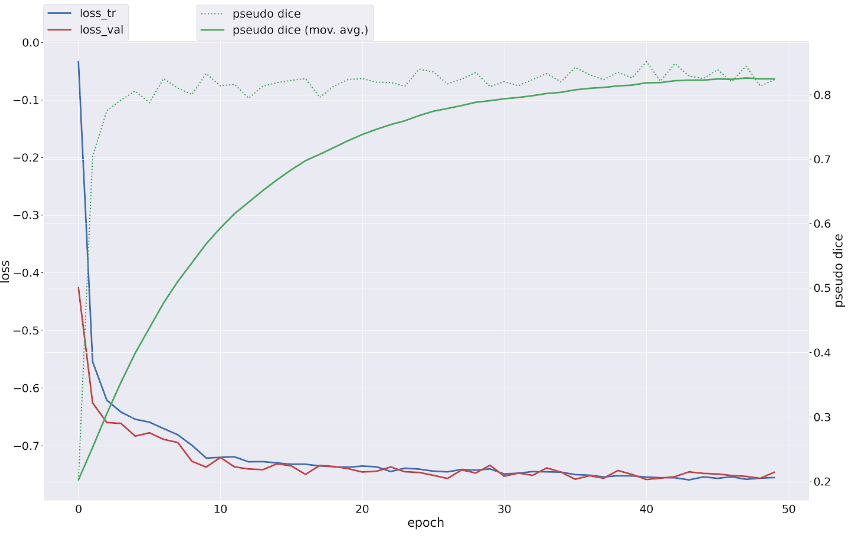

In [ ]:
#Fold 4/5
!{ENV_VARS + "nnUNetv2_train 11 3d_fullres 3 --c --npz"}

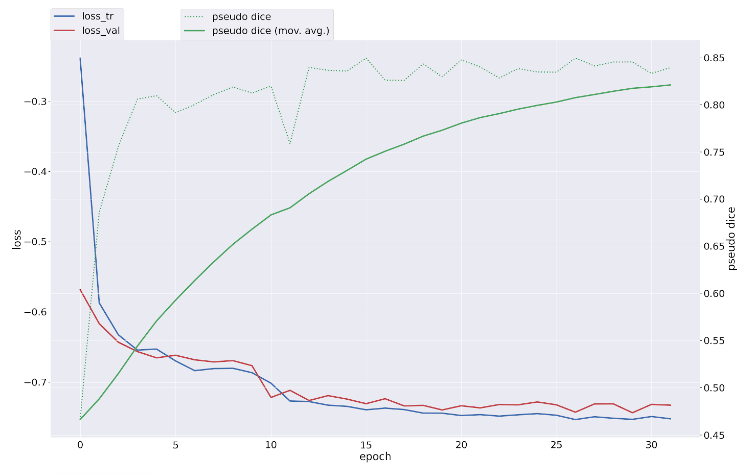

In [ ]:
# Fold 5/5
!{ENV_VARS + "nnUNetv2_train 11 3d_fullres 4 --c --npz"}

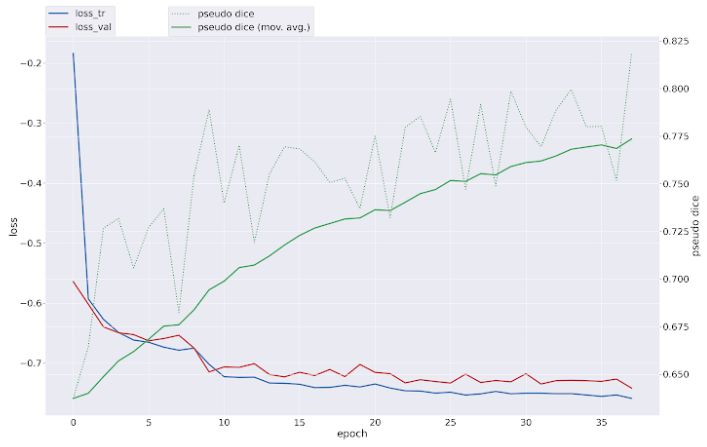

### `3d`
3d_fullres / **ALL**

Train a single model with 3D U-Net architecture on all training cases.

In [ ]:
!{ENV_VARS + "nnUNetv2_train 11 3d_fullres all --c --npz"}

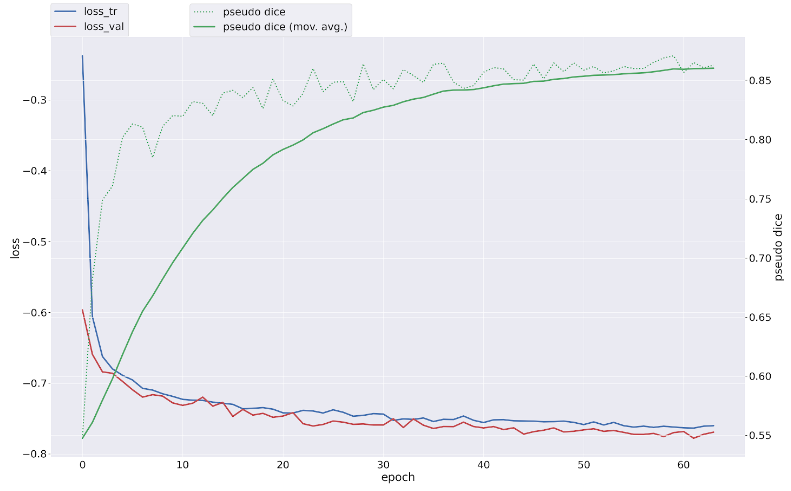

# 5) Inference

`280` clean and `280` noisy (obtained by noising the clean) test images located at `data/test/` are used for segmentation mask inference. 5 inference scenarios (`2d-cv`, `3d-cv`, `2d`, `3d`, `genesis`) are executed for each clean and noisy image sets and resulting predicted masks are saved to `results/predictions/` with folder names `{MODEL_NAME}_{CLEAN_OR_NOISY}/`. Additionally, 'best' model weights (based on the validation pseudo dice scores) are hand picked and stored at `results/models/`.<br>
<br>
For 2D and 3D models trained with cross-validation (`2d-cv` and `3d-cv`), inference is done with all 5 folds as an **ensemble**. Hence all 5 folds for each architecture produces one set of predictions. For `2d-cv` inference takes around 47 minutes and for `3d-cv` it takes around 10 minutes for 280 cases. For 2D and 3D models trained on all training data (`2d` and `3d`), inference is done with those single models. For `2d`, inference takes around 11 minutes and for `2d` it takes around 2 minutes for 280 cases. For Models Genesis pretrained model (`genesis`), which is also a 3D U-Net architecture, inference takes around 5 minutes for clean and noisy images together (560 cases).

## 5.1) 2D U-Net Models Inference


### `2d-cv`
2d / **5-fold Cross-Validation**

In [ ]:
# Predict with clean images
command = ENV_VARS + f"nnUNetv2_predict -i {CLEAN_IMG_DIRECTORY} -o {CV_CLEAN_2D} -d 11 -c 2d"
!{command}

In [ ]:
# Predict with noisy images
command = ENV_VARS + f"nnUNetv2_predict -i {NOISY_IMG_DIRECTORY} -o {CV_NOISY_2D} -d 11 -c 2d"
!{command}

### `2d`
2d / **ALL**

In [ ]:
# Predict with clean images
command = ENV_VARS + f"nnUNetv2_predict -i {CLEAN_IMG_DIRECTORY} -o {CLEAN_2D} -d 11 -c 2d -f all"
!{command}

In [ ]:
# Predict with noisy images
command = ENV_VARS + f"nnUNetv2_predict -i {NOISY_IMG_DIRECTORY} -o {NOISY_2D} -d 11 -c 2d -f all"
!{command}

## 5.2) 3D U-Net Models Inference

### `3d-cv`
3d / **5-fold Cross-Validation**

In [ ]:
# Predict with clean images
command = ENV_VARS + f"nnUNetv2_predict -i {CLEAN_IMG_DIRECTORY} -o {CV_CLEAN_3D} -d 11 -c 3d_fullres"
!{command}

In [ ]:
# Predict with noisy images
command = ENV_VARS + f"nnUNetv2_predict -i {NOISY_IMG_DIRECTORY} -o {CV_NOISY_3D} -d 11 -c 3d_fullres"
!{command}

### `3d`
3d - **ALL**

In [ ]:
# Predict with clean images
command = ENV_VARS + f"nnUNetv2_predict -i {CLEAN_IMG_DIRECTORY} -o {CLEAN_3D} -d 11 -c 3d_fullres -f all"
!{command}

In [ ]:
# Predict with noisy images
command = ENV_VARS + f"nnUNetv2_predict -i {NOISY_IMG_DIRECTORY} -o {NOISY_3D} -d 11 -c 3d_fullres -f all"
!{command}

## 5.3) Pretrained Model Genesis Inference

`genesis`<br>
<br>
Pretrained *Model Genesis* weights (`genesis_weights.pt`) and model architecture (`genesis_model.py`) are downloaded and stored at `results/models/`. Similar to inference with trained models, masks for both clean and noisy images are predicted. Additionally, a simple post-processing (one-level thresholding) is applied to obtain binary segmentation masks.

In [ ]:
import sys
sys.path.append(MODELS_DIRECTORY)
from genesis_model import UNet3D # Model architecture to load the pretrained weights of Genesis Model


class test_dataset(Dataset):
    def __init__(self, root, transform=transforms.ToTensor()):
        self.root = root
        self.transform = transform
        self.all_files = [f for f in sorted(os.listdir(self.root)) if f.endswith('.nii.gz')]

    def __getitem__(self, index):
        img_path = os.path.join(self.root, self.all_files[index])
        img = nib.load(img_path).get_fdata().astype(np.uint8)
        img = self.transform(img).unsqueeze(0)
        return img

    def __len__(self):
        return len(self.all_files)


# Loading pretrained model
model = UNet3D()
checkpoint = torch.load(os.path.join(MODELS_DIRECTORY, "genesis_weights.pt"))
state_dict = checkpoint['state_dict']
unParalled_state_dict = {}
for key in state_dict.keys():
    unParalled_state_dict[key.replace("module.", "")] = state_dict[key]
model.load_state_dict(unParalled_state_dict)
model = model.to(DEVICE)

# Datasets and Dataloaders
testset_clean = test_dataset(CLEAN_IMG_DIRECTORY)
clean_dataloader = DataLoader(testset_clean, batch_size=1, shuffle=False) # Batch size must be 1 for this saving approach
testset_noisy = test_dataset(NOISY_IMG_DIRECTORY)
noisy_dataloader = DataLoader(testset_noisy, batch_size=1, shuffle=False) # Batch size must be 1 for this saving approach

# Random ground truth mask: its affine is used to convert predicted masks back to NIfTI images
sample_mask = nib.load(os.path.join(MASK_DIRECTORY, "TEST_0001.nii.gz"))
mask_affine = sample_mask.affine

# Inference and saving results
for data_loader, save_dir in zip([clean_dataloader, noisy_dataloader], [CLEAN_GENESIS, NOSIY_GENESIS]):
    for index, img in enumerate(data_loader):
        with torch.no_grad():
            mask = ((model(img.to(DEVICE)).squeeze(0).squeeze(0) > THRESHOLD) * 1).to("cpu")
        mask_nifti = nib.Nifti1Image(mask.numpy().astype(np.uint8), mask_affine)
        mask_nifti_filename = os.path.join(save_dir, f'TEST_{index+1:04d}.nii.gz')
        nib.save(mask_nifti, mask_nifti_filename)
        print("Saved predicted mask:", mask_nifti_filename)

# 6) Model Performance Evaluation

## 6.1) Prediction Visualization

You may use the `vis_pred(...)` function with appropriate input to visualize the predicted masks together with input images and ground truths for any mode (`2d`, `2d-cv`, `3d`, `3d-cv`, `genesis`) and any testset (`img_noisy` or `img_clean`).

Be careful with the index value, as the test dataset contains 280(0 to 279) images.

**Note:** First func call takes a little while due to loading all file names in dataset but next calls are quiet fast thanks to caching.  

In [4]:
def vis_pred(index=10, model_id=1, noisy=True, slice=32):
    """
    vis_pred Visualizes a representative slice for the desired mask predicted with
    any of the models. Input image and ground truth masks are also provided.
    param index:    Index of the test image used for the prediction.
    param model_id: Name of the model used for prediction.
                    (2d, 2d-cv, 3d, 3d-cv or genesis)
    param noisy:    True if prediction is made with noisy image, False otherwise.
    param slice:    Slice index of the test image to be visualized.
    return:         None, visualizes the data and prompts the according filenames.
    """

    if model_id == 1:
        model_name = "2d"
    elif model_id == 2:
        model_name = "2d-cv"
    elif model_id == 3:
        model_name = "3d"
    elif model_id == 4:
        model_name = "3d-cv"
    else:
        model_name = "genesis"

    if noisy:
        test_img_path = NOISY_IMG_DIRECTORY
        pred_mask_path = os.path.join(PREDICTIONS_DIRECTORY, model_name + "_noisy")
    else:
        test_img_path = CLEAN_IMG_DIRECTORY
        pred_mask_path = os.path.join(PREDICTIONS_DIRECTORY, model_name + "_clean")

    gt_path= MASK_DIRECTORY

    all_test_img_names = [f for f in sorted(os.listdir(test_img_path)) if f.endswith('.nii.gz')]
    all_pred_mask_names = [f for f in sorted(os.listdir(pred_mask_path)) if f.endswith('.nii.gz')]
    all_gt_names = [f for f in sorted(os.listdir(gt_path)) if f.endswith('.nii.gz')]

    if((all_pred_mask_names != all_gt_names) or (all_pred_mask_names!=[f.replace("_0000", "") for f in all_test_img_names ])):
        print("!!! Some files are missing in one of the folders !!!")
        return

    test_img = nib.load(os.path.join(test_img_path, all_test_img_names[index])).get_fdata()
    pred_mask = nib.load(os.path.join(pred_mask_path, all_pred_mask_names[index])).get_fdata()
    gt = nib.load(os.path.join(gt_path, all_gt_names[index])).get_fdata()

    fig, axes = plt.subplots(1,3)
    axes[0].imshow(test_img[slice], cmap='gray')
    axes[0].axis('off')
    axes[0].set_title(f'{"Noisy" if noisy else "Clean"} CT {index}(S:{slice})')
    axes[1].imshow(pred_mask[slice], cmap='gray')
    axes[1].axis('off')
    axes[1].set_title(f'{model_name} Prediction')
    axes[2].imshow(gt[slice], cmap='gray')
    axes[2].axis('off')
    axes[2].set_title(f'Ground Truth {index}')

    print(f'{"Noisy" if noisy else "Clean"} CT {index} predicted with model {model_name}')
    #print("Test image file:",os.path.join(test_img_path, all_test_img_names[index]))
    #print("Predicted mask file:", os.path.join(pred_mask_path, all_pred_mask_names[index]))
    #print("Ground truth mask file:", os.path.join(gt_path, all_gt_names[index]))
    print()
    return

Clean CT 2 predicted with model 2d

Clean CT 2 predicted with model 2d-cv

Clean CT 2 predicted with model 3d

Clean CT 2 predicted with model 3d-cv

Clean CT 2 predicted with model genesis

Clean CT 0 predicted with model 2d

Clean CT 0 predicted with model 2d-cv

Clean CT 0 predicted with model 3d

Clean CT 0 predicted with model 3d-cv

Clean CT 0 predicted with model genesis

Noisy CT 17 predicted with model 2d

Noisy CT 17 predicted with model 2d-cv

Noisy CT 17 predicted with model 3d

Noisy CT 17 predicted with model 3d-cv

Noisy CT 17 predicted with model genesis



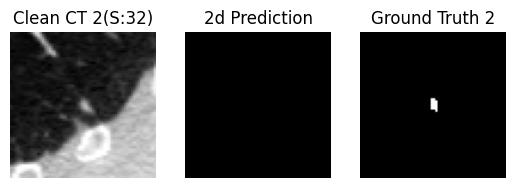

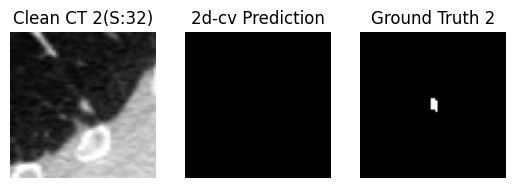

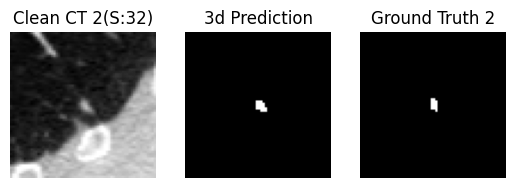

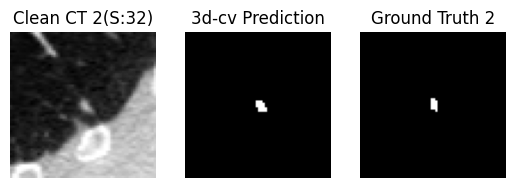

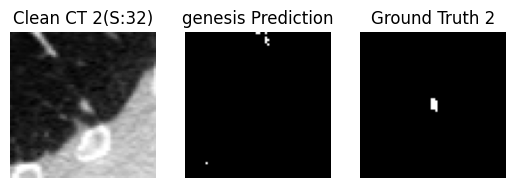

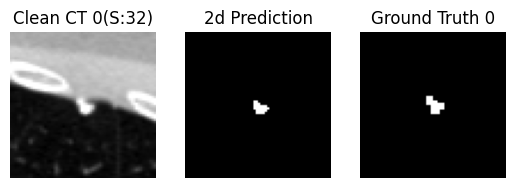

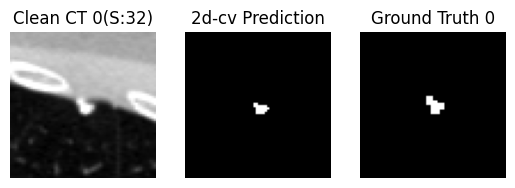

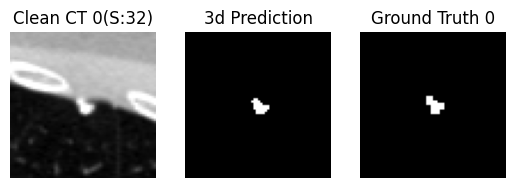

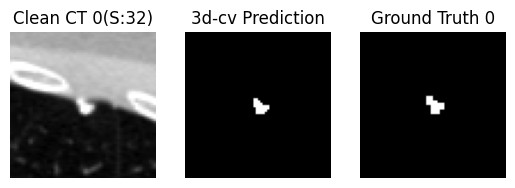

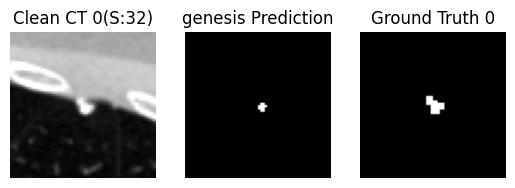

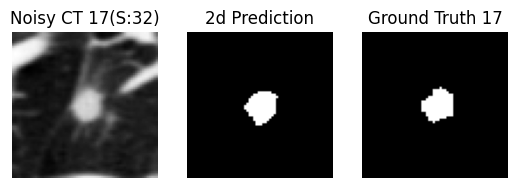

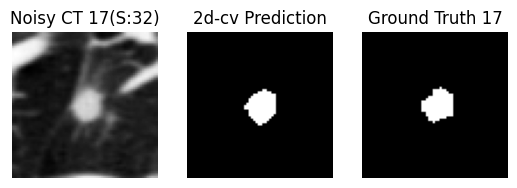

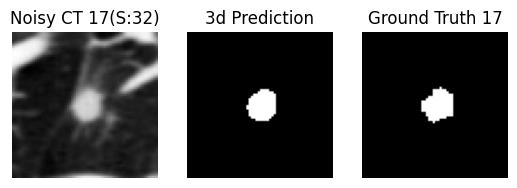

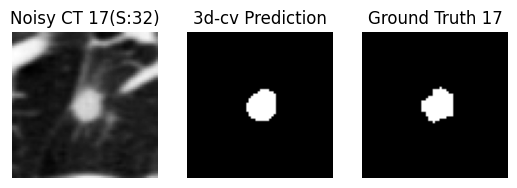

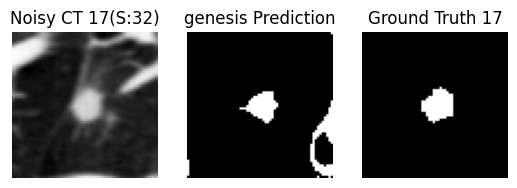

In [5]:
# Example visualization
for i in range(5):
    vis_pred(2, i+1, False) # Predicting noisy image 3 with all models

for i in range(5):
    vis_pred(0, i+1, False) # Predicting noisy image 1 with all models

for i in range(5):
    vis_pred(17, i+1) # Predicting clean image 17 with all models

## 6.2) Evaluation Metrics

3 different metrics for evaluating the accuracy of the model is used:

1. `iou`: Intersection over Union (IoU) (Jaccard Index) <br>
    IoU = (Intersection Area) / (Union Area)
<br>
<br>
2. `dice`: Dice Coefficient (F1 Score) <br>
    Dice Coefficient = (2 * Intersection Area) / (Predicted Area + Ground Truth Area)
<br>
<br>
3. `pix_acc`: Pixel Accuracy <br>
    Pixel Accuracy = (Number of Correctly Classified Pixels) / (Total Number of Pixels) <br>
    (Equivalently) Pixel Accuracy = #TP + #TN / #TP + #TN + #FP + #FN

In [ ]:
def make_bin_int(t):
    sig = torch.nn.Sigmoid()
    return (sig(t) > THRESHOLD) * 1

#IoU = (Intersection Area) / (Union Area)
def calc_iou(preds, target):
    preds = make_bin_int(preds)
    target = make_bin_int(target)

    # Method 1: torchmetrics
    # !!! Requires following 5 lines below to be included in configurations:
    #try:
    #    from torchmetrics.classification import BinaryJaccardIndex
    #except:
    #    !pip install torchmetrics
    #    from torchmetrics.classification import BinaryJaccardIndex
    #metric = BinaryJaccardIndex()
    #return metric(preds, target).item()

    # Method 2: My implementation
    #inter = torch.sum(((preds + target) == 2)).item() # Intersection area
    #return inter / ((torch.sum(preds).item() + torch.sum(target)).item() - inter)

    # Method 3: My other implementation
    return torch.sum(torch.logical_and(preds, target)).item() / torch.sum(torch.logical_or(preds, target)).item()

#Dice Coefficient = (2 * Intersection Area) / (Predicted Area + Ground Truth Area)
def calc_dice(preds, target):
    preds = make_bin_int(preds)
    target = make_bin_int(target)

    # Method 1: My Implementation
    #return 2 * torch.sum(((preds + target) == 2)).item() / (torch.sum(preds) + torch.sum(target)).item()

    # Method 2: My Other Implementation
    return 2 * torch.sum(torch.logical_and(preds, target)).item() / (torch.sum(preds) + torch.sum(target)).item()


#Pixel Accuracy = (Number of Correctly Classified Pixels) / (Total Number of Pixels)
# Also #TP + #TN / #TP + #TN + #FP + #FN
def calc_pix_acc(preds, target):
    preds = make_bin_int(preds)
    target = make_bin_int(target)

    # Method 1: My Implementation
    return (torch.sum(preds == target) / torch.numel(target)).item()

## 6.3) Evaluating Models

For all models, `mean IoU`, `mean Dice` and `mean pixel accuracy` scores are calculated over the noisy (280 images) and clean (280 images) predictions seperately. Hence, 6 scores for each model is saved to the `TumSeg_results.json` at `results/`.

Results are also prompted below.

In [ ]:
class mask_dataset(Dataset):
    def __init__(self, root, transform=transforms.ToTensor()):
        self.root = root
        self.transform = transform
        self.all_mask_files = [f for f in sorted(os.listdir(root)) if f.endswith('.nii.gz')]

    def __getitem__(self, index):
        mask_path = os.path.join(self.root, self.all_mask_files[index])
        mask = nib.load(mask_path).get_fdata().astype(np.uint8) * 255
        mask = self.transform(mask)
        return mask

    def __len__(self):
        return len(self.all_mask_files)

MODELS = ["2d", "3d", "2d-cv", "3d-cv", "genesis"] # Trained and pretrained models
BATCH_SIZE = 20 # (Number of cases % BATCH_SIZE) should be 0 to correctly calculate the mean of metric scores
results = {} # To store and save results as a json file

for model_name in MODELS:
    print(f"Evaluating {model_name}...")

    noisy_pred_folder = os.path.join(PREDICTIONS_DIRECTORY, f"{model_name}_noisy")
    clean_pred_folder = os.path.join(PREDICTIONS_DIRECTORY, f"{model_name}_clean")
    gt_folder = MASK_DIRECTORY

    # Datasets and dataloaders to load predictions and ground truths
    noisy_dataset = mask_dataset(noisy_pred_folder)
    noisy_dataloader = DataLoader(noisy_dataset, batch_size=BATCH_SIZE, shuffle=False)
    clean_dataset = mask_dataset(clean_pred_folder)
    clean_dataloader = DataLoader(clean_dataset, batch_size=BATCH_SIZE, shuffle=False)
    gt_dataset = mask_dataset(gt_folder)
    gt_dataloader = DataLoader(gt_dataset, batch_size=BATCH_SIZE, shuffle=False)

    # Variables to first accumulate scores and then calculate means for each metric
    divider = len(gt_dataset) / BATCH_SIZE # (Number of cases / BATCH_SIZE) value to find the mean of metrics
    mean_clean_iou = 0
    mean_noisy_iou = 0
    mean_clean_dice = 0
    mean_noisy_dice = 0
    mean_clean_pix_acc = 0
    mean_noisy_pix_acc = 0

    for noisy_batch, clean_batch, mask_batch in zip(noisy_dataloader, clean_dataloader, gt_dataloader):
        (noisy_batch, clean_batch, mask_batch) = (noisy_batch.to(DEVICE), clean_batch.to(DEVICE), mask_batch.to(DEVICE))

        mean_clean_iou += calc_iou(clean_batch, mask_batch)
        mean_noisy_iou += calc_iou(noisy_batch, mask_batch)

        mean_clean_dice += calc_dice(clean_batch, mask_batch)
        mean_noisy_dice += calc_dice(noisy_batch, mask_batch)

        mean_clean_pix_acc += calc_pix_acc(clean_batch, mask_batch)
        mean_noisy_pix_acc += calc_pix_acc(noisy_batch, mask_batch)

    # Store the results in the dictionary
    results[model_name] = {
        "Mean_clean_iou_score": mean_clean_iou / divider,
        "Mean_noisy_iou_score": mean_noisy_iou / divider,
        "Mean_clean_dice_score": mean_clean_dice / divider,
        "Mean_noisy_dice_score": mean_noisy_dice / divider,
        "Mean_clean_pix_acc_score": mean_clean_pix_acc / divider,
        "Mean_noisy_pix_acc_score": mean_noisy_pix_acc / divider
    }

    print(f"Evaluation Results:")
    for key in results[model_name].keys():
        print(f"{key} => {results[model_name][key]:1.4f}")
    print()

with open(os.path.join(RESULTS_DIRECTORY, f"TumSeg_results.json"), "w") as json_file:
    json.dump(results, json_file, indent=4)

Evaluating 2d...
Evaluation Results:
Mean_clean_iou_score => 0.5861
Mean_noisy_iou_score => 0.5864
Mean_clean_dice_score => 0.7302
Mean_noisy_dice_score => 0.7304
Mean_clean_pix_acc_score => 0.9968
Mean_noisy_pix_acc_score => 0.9968

Evaluating 3d...
Evaluation Results:
Mean_clean_iou_score => 0.6989
Mean_noisy_iou_score => 0.6989
Mean_clean_dice_score => 0.8206
Mean_noisy_dice_score => 0.8207
Mean_clean_pix_acc_score => 0.9976
Mean_noisy_pix_acc_score => 0.9976

Evaluating 2d-cv...
Evaluation Results:
Mean_clean_iou_score => 0.5886
Mean_noisy_iou_score => 0.5884
Mean_clean_dice_score => 0.7313
Mean_noisy_dice_score => 0.7312
Mean_clean_pix_acc_score => 0.9968
Mean_noisy_pix_acc_score => 0.9968

Evaluating 3d-cv...
Evaluation Results:
Mean_clean_iou_score => 0.6883
Mean_noisy_iou_score => 0.6886
Mean_clean_dice_score => 0.8118
Mean_noisy_dice_score => 0.8120
Mean_clean_pix_acc_score => 0.9976
Mean_noisy_pix_acc_score => 0.9976

Evaluating genesis...
Evaluation Results:
Mean_clean_iou_s

## 6.4) Evaluation Results Visualization

Each of 6 scores, calculated for all models, is plotted as bar plots seperately.  

<ipython-input-74-1f6c3cac4df3>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10')


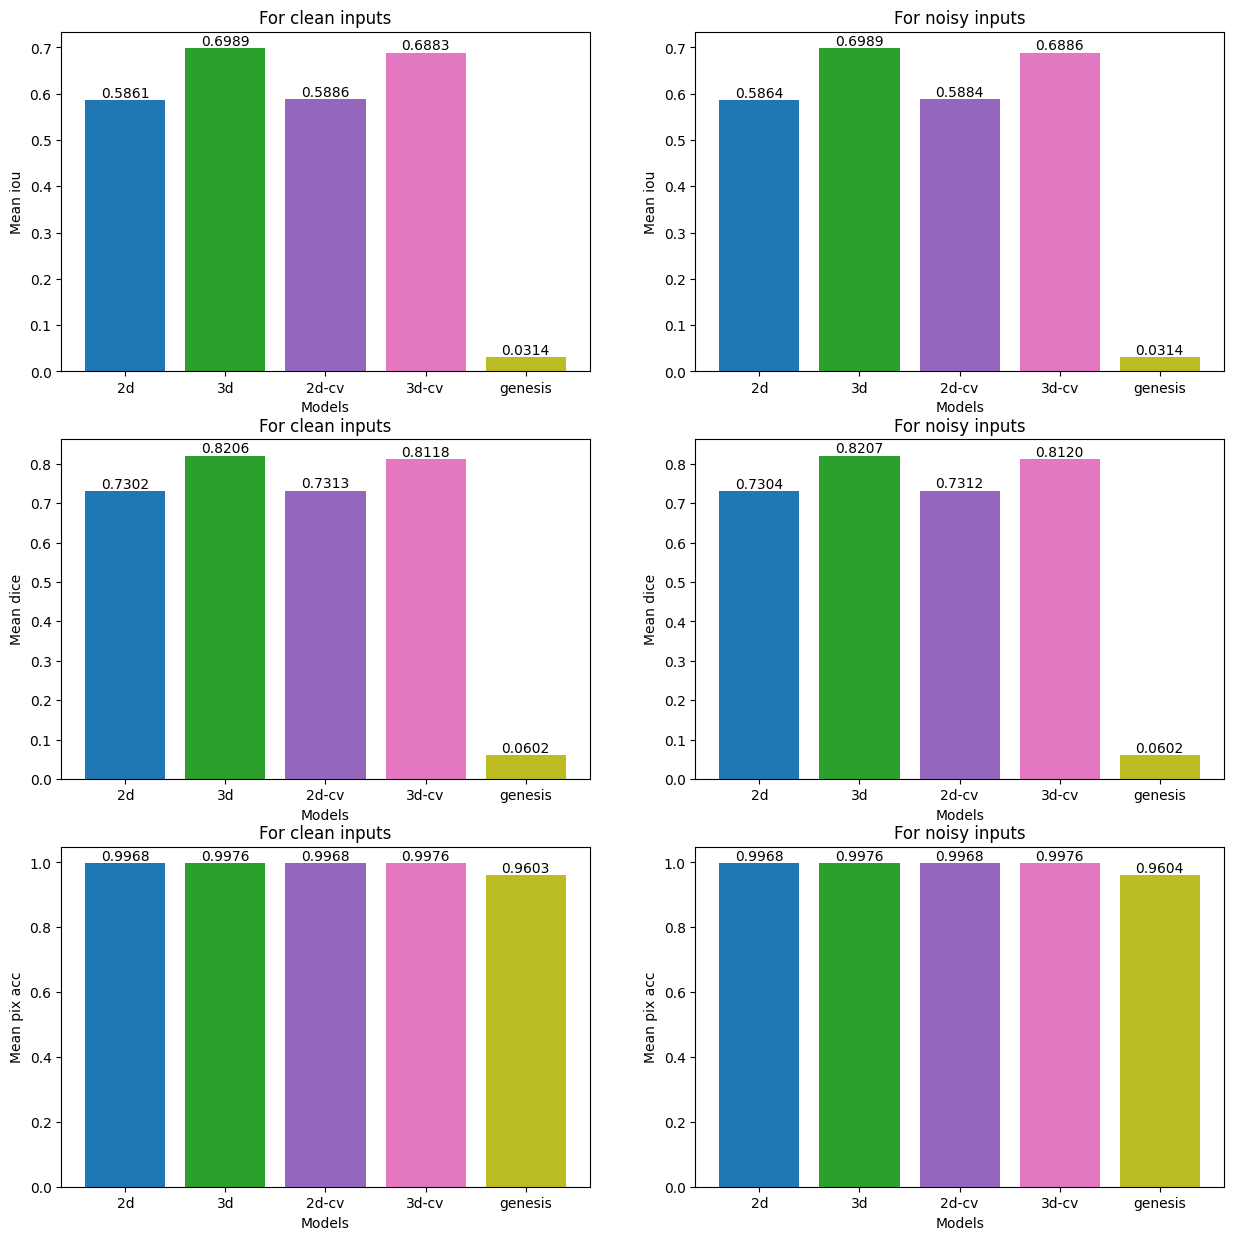

In [ ]:
with open(os.path.join(RESULTS_DIRECTORY, "TumSeg_results.json"), 'r') as json_file:
    results = json.load(json_file)

model_names = list(results.keys())
metrics = list(results[model_names[1]].keys())

fig, axes = plt.subplots(len(metrics)//2, 2)
fig.set_figwidth(15)
fig.set_figheight(15)
color_map = plt.cm.get_cmap('tab10')
colors = [color_map(i) for i in np.linspace(0, 1, len(metrics))]

for index, metric in enumerate(metrics):
    a = axes[index // 2][index % 2]
    values = [results[model][metric] for model in model_names]
    bars = a.bar(model_names, values, color=colors)
    a.set_title(f'For {metric.split("_")[1]} inputs')
    a.set_xlabel("Models")
    a.set_ylabel(f'Mean {metric.split("_")[2] if (metric.split("_")[3] == "score") else (metric.split("_")[2] + " " + metric.split("_")[3])}')
    for bar, value in zip(bars, values):
        a.text(bar.get_x() + bar.get_width() / 2, value, f'{value:.4f}', ha='center', va='bottom')


# 7) Demo Inference

Finally, trained *TumSeg* mmodels and the pre-trained *Model Genesis* can be used for inference with your own data simply! You just need to follow few steps and your input dataset should be in a specific format.

**Guidelines for inference:**
1. Place any number of `64x64x64` sized, integer valued `[0, 255]('uint8')`  images with `.nii.gz` extension to `demo_inference/demo_input/` folder. Filenames should be `{CASE_ID}_0000.nii.gz` where `{CASE_ID}` is any name you want. `_0000` is to label the modality of images and is required for compatibility with nnU-Net. (There is one sample input named `DEMO_0000.nii.gz` in `demo_input/`)
2. Run the `predict()` function below and give a suitable `model_name` from the list (`2d`, `2d-cv`, `3d`, `3d-cv`, `genesis`) to make predictions with.
3. Your predicted segmentation masks are calculated and saved to `demo_inference/demo_output/` folder with `{CASE_ID}.nii.gz` name.
4. You may visualize your predictions with the `vis_demo()` function.


In [ ]:
def predict(model_name = "3d"):
    MODELS = ["2d", "3d", "2d-cv", "3d-cv", "genesis"]
    if model_name not in MODELS:
        print("!!! Invalid model name !!!")
        print("Please select from the list", MODELS)
        return
    if model_name == "genesis":
        import sys
        sys.path.append(MODELS_DIRECTORY)
        from genesis_model import UNet3D # Model architecture to load the pretrained weights of Genesis Model

        # Loading pretrained model
        model = UNet3D()
        checkpoint = torch.load(os.path.join(MODELS_DIRECTORY, "genesis_weights.pt"))
        state_dict = checkpoint['state_dict']
        unParalled_state_dict = {}
        for key in state_dict.keys():
            unParalled_state_dict[key.replace("module.", "")] = state_dict[key]
        model.load_state_dict(unParalled_state_dict)
        model = model.to(DEVICE)

        img_names = [f for f in sorted(os.listdir(DEMO_INPUT)) if f.endswith('.nii.gz')]
        # Random ground truth mask: its affine is used to convert predicted masks back to NIfTI images
        sample_mask = nib.load(os.path.join(MASK_DIRECTORY, "TEST_0001.nii.gz"))
        mask_affine = sample_mask.affine

        # Predict and save mask
        for index, img_name in enumerate(img_names):
            img_path = os.path.join(DEMO_INPUT, img_name)
            img = nib.load(img_path).get_fdata().astype(np.uint8)
            img = transforms.ToTensor()(img).unsqueeze(0).unsqueeze(0)
            with torch.no_grad():
                mask = ((model(img.to(DEVICE)).squeeze(0).squeeze(0) > THRESHOLD) * 1).to("cpu")
            mask_nifti = nib.Nifti1Image(mask.numpy().astype(np.uint8), mask_affine)
            mask_nifti_filename = os.path.join(DEMO_OUTPUT, f'{img_name[:-12]}.nii.gz')
            nib.save(mask_nifti, mask_nifti_filename)
            print(f'Predicted mask for {img_name} is saved to {mask_nifti_filename}')

    else:
        if "cv" in model_name:
            if "3d" in model_name:
                command = ENV_VARS + f"nnUNetv2_predict -i {DEMO_INPUT} -o {DEMO_OUTPUT} -d 11 -c 3d_fullres"
            else:
                command = ENV_VARS + f"nnUNetv2_predict -i {DEMO_INPUT} -o {DEMO_OUTPUT} -d 11 -c 2d"
        else:
            if "3d" in model_name:
                command = ENV_VARS + f"nnUNetv2_predict -i {DEMO_INPUT} -o {DEMO_OUTPUT} -d 11 -c 3d_fullres -f all"
            else:
                command = ENV_VARS + f"nnUNetv2_predict -i {DEMO_INPUT} -o {DEMO_OUTPUT} -d 11 -c 2d -f all"
        !{command}


def vis_demo(index=0, slice=32):
    img_names = [f for f in sorted(os.listdir(DEMO_INPUT)) if f.endswith('.nii.gz')]
    pred_mask_names = [f for f in sorted(os.listdir(DEMO_OUTPUT)) if f.endswith('.nii.gz')]

    img = nib.load(os.path.join(DEMO_INPUT, img_names[index])).get_fdata()
    pred_mask = nib.load(os.path.join(DEMO_OUTPUT, pred_mask_names[index])).get_fdata()

    fig, axes = plt.subplots(1,2)
    axes[0].imshow(img[slice], cmap='gray')
    axes[0].axis('off')
    axes[0].set_title(f'Demo Input {index}(S:{slice})')
    axes[1].imshow(pred_mask[slice], cmap='gray')
    axes[1].axis('off')
    axes[1].set_title(f'Predicted Mask')

In [ ]:
predict() # Example prediction with 3d model

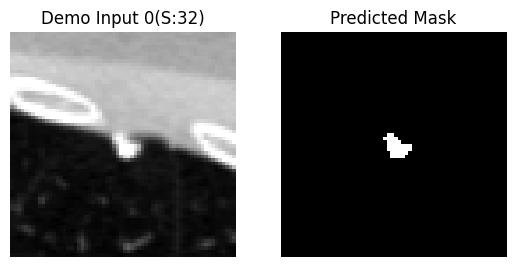

In [ ]:
vis_demo() # Example visualization for the predicted mask 0

# 8) Discussion

Based on the evaluation of model performance and visualized predicted mask, few observations are made as below:

1. As expected, 3d models produce better scores than 2d models as expected since they can also capture the 3d spatial information. Similarly, 3d models can capture small sized tumors as in test case 3 where 2d models fail to segment such tumors.

2. Results are almost identical for noisy and clean test images which either imply that added noise standard deviation is not sufficient for discrimination between models or trained models are gaussian noise invariant. Further experimenting is required. <br> Changing NOISE_STD parameter and running the whole notebook is a simple operation thanks to generic designf but very time-consuming (approx. 2-4 days depending on the number of epochs and utilization of multiple notebooks.)

3. Pixel accuracy metric fails to produce meaningfull results since most of the scans have very large background regions consisting of constant 0 values. Hence pixel accuracy for all models are very large and similar.

4. Pretrained *Model Genesis* fails to produce meaningfull results for most of the scans as demonstrated in scores and prediction visualization. Reason of this failure might be highly dependent on the post-processing method (thresholding) applied. Further experimentation with this model is required before using it as a reference in benchmarking model performance.